## Atividade - Árvore de Decisão
1. Utilizamos a medida de Entropia como fator de decisão (medida de impureza de um nó). Teste o mesmo conjunto randômico de dados para a medida Gini e compare os resultados. Ref1.: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier Ref2.: https://en.wikipedia.org/wiki/Decision_tree_learning

2. Faça o balanceamento dos dados contidos em "train.csv", aplique o algoritmo de Decision Tree e faça a submissão no kaggle. Tente melhorar o resultado obtido em sala de aula (posição 3100 no leaderboard). Dataset: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

3. (Opcional) Execute uma Random Forest na competição do Kaggle e veja se a acurácia melhora. Utilize 10, 100 ou 1000 árvores (dependendo de quanto o seu computador aguentar =]): http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [2]:
import os
import pandas as pd
import math
import numpy as np
from sklearn.tree import DecisionTreeClassifier

### 1

In [5]:
headers = ["buying", "maint", "doors", "persons","lug_boot", "safety", "class"]
data = pd.read_csv("car_data.csv", header=None, names=headers)

data = data.sample(frac=1).reset_index(drop=True) # shuffle

for h in headers:
    data[h] = data[h].astype('category')
    data[h] = data[h].cat.codes

data.set_index("class", inplace=True) 
# dados convertidos e utilizáveis

In [6]:
size = len(data)
train_size = int(math.floor(size * 0.7))
train_data = data[:train_size]
test_data = data[train_size:]

In [8]:
d_tree = DecisionTreeClassifier(criterion="gini") 
d_tree.fit(train_data, train_data.index)
d_tree.predict(test_data.iloc[:, 0:6])
score = d_tree.score(test_data, test_data.index)
print("Gini score: {}".format(score))

Gini score: 0.9672447013487476


### 2

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
from collections import Counter

In [119]:
df = pd.read_csv("car_data.csv")

In [120]:
labelencoder_X=LabelEncoder()
for i in range(0,7):
    df.iloc[:,i] = labelencoder_X.fit_transform(df.iloc[:, i])

In [117]:
x = df.iloc[:, 2:]
y = df.iloc[:, 1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [125]:
print('Original dataset shape {}'.format(Counter(y_train))) ## dataset já balanceado, não consegui outro dataset fora esse :/

Original dataset shape Counter({2: 313, 3: 310, 1: 293, 0: 292})


In [126]:
d_tree = DecisionTreeClassifier(criterion='gini')
d_tree.fit(x_train, y_train)
y_hat = d_tree.predict(x_test)

print("Score: {}".format(d_tree.score(x_test, y_test)))

Score: 0.0905587668593449


### 3

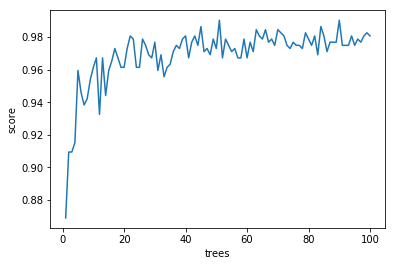

In [132]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

def randomForestScores(limitTrees, train_data):
    scores = []
    for i in range(1, limitTrees):
        toFitTrainData = train_data
        d_tree = RandomForestClassifier(n_estimators=i, criterion='entropy')
        d_tree.fit(toFitTrainData, toFitTrainData.index)
        
        d_tree.predict(test_data.iloc[:, 0:6])
        score = d_tree.score(test_data, test_data.index)
        scores.append(score)
    return scores

headers = ["buying", "maint", "doors", "persons","lug_boot", "safety", "class"]
data = pd.read_csv("car_data.csv", header=None, names=headers)

data = data.sample(frac=1).reset_index(drop=True) # shuffle

for h in headers:
    data[h] = data[h].astype('category')
    data[h] = data[h].cat.codes

data.set_index("class", inplace=True) 
# dados convertidos e utilizáveis

size = len(data)
train_size = int(math.floor(size * 0.7))
train_data = data[:train_size]
test_data = data[train_size:]

scores = randomForestScores(101, train_data) # teste de 1 a 100 árvores

plt.plot(range(1, 101), scores)
plt.xlabel('trees')
plt.ylabel('score')
plt.show()